# Fraud Detection

Financial institutions face challenges in detecting and preventing fraudulent transactions, which can result in significant financial losses. Developing a machine learning model that analyzes transaction patterns and user behaviours to detect and flag potentially fraudulent activities in real-time.

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# converting categorical variables into numerical
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
# for mrsuring acuuray
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics

In [2]:
# reading data
df=pd.read_csv("fraud.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df['type'].value_counts()


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

## Exploratory Data Analyses

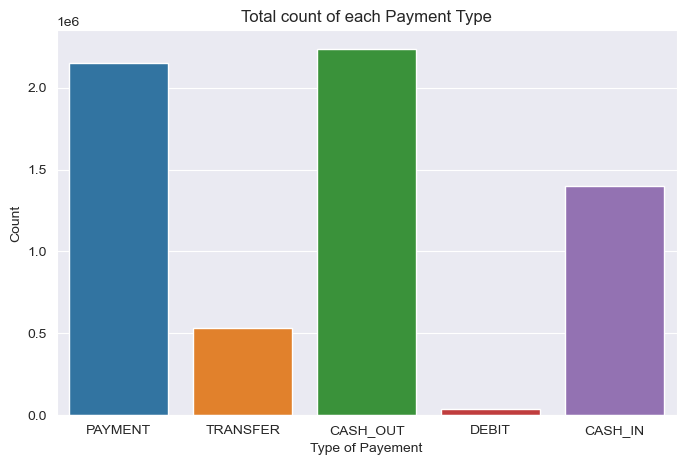

In [9]:
# Payment Types count

sns.set_style("darkgrid")
plt.figure(figsize=(8,5))
# df[df['isFraud']==0].count()
sns.countplot(data=df,x='type')
plt.xlabel("Type of Payement")
plt.ylabel("Count")
plt.title("Total count of each Payment Type")
plt.show()

Most of the transaction was carried out by  "cash _out " Payment type. and the least payment type for the transaction was "Debit".Mostly people uses financial transaction for either getting the cash out or for the payment purposes.

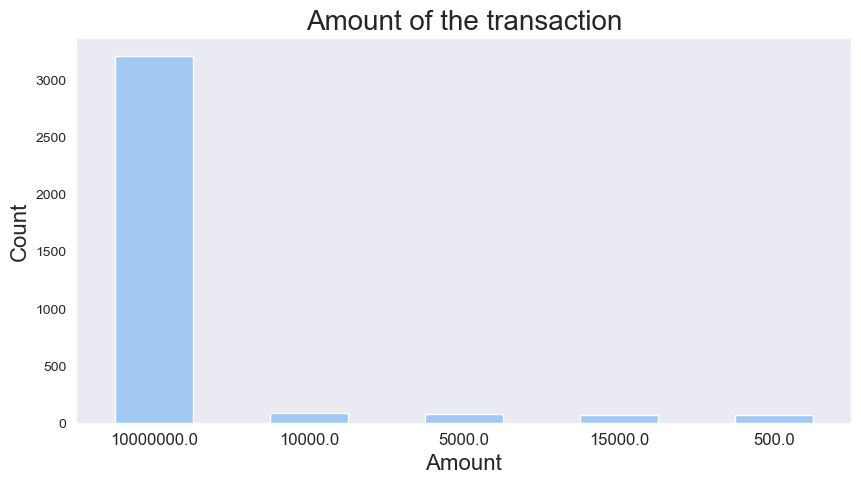

In [10]:
# Transaction amount

sns.set_style("dark") # set the style of the plot as dark grid
sns.set_palette("pastel")
plt.figure(figsize = (10,5))
df['amount'].value_counts().sort_values(ascending = False).head().plot(kind = 'bar')
# sns.countplot(data=df,x='amount')
plt.title("Amount of the transaction", fontsize = 20)
plt.xticks(rotation = 0, fontsize = 12)
plt.xlabel('Amount', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()

+ The most frequent transaction amount is 10,000,000,dollar occurring 3207 times. This suggests that there may be a common transaction size or a default value used for certain types of transactions.
+ The distribution of transaction amounts appears to be heavily skewed, with a significant number of transactions being of the dominant amount. This could indicate a specific type of transaction or a system-generated value.
+ It might be worth investigating transactions that are significantly different from the most common amount. For instance, the presence of transactions with amounts much smaller than 10,000,000 dollar (e.g., 500 dollar or 5,000 dollar) could be outliers or represent a different category of transactions.

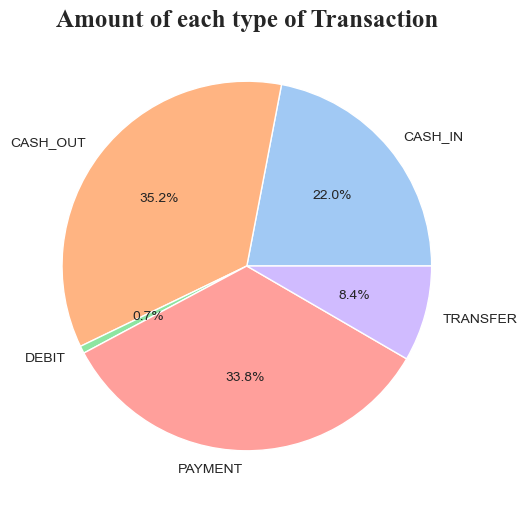

In [11]:
# counting amount with respect to each Payment type

counts = df.groupby('type').count()['amount']
plt.figure(figsize=(8,6))
plt.pie(counts,labels=counts.index,autopct = "%1.1f%%")
plt.title('Amount of each type of Transaction', fontweight = 'bold', fontsize = 18, fontfamily = 'times new roman')
plt.show()

+ There are five types of transaction that includes CASH-OUT, CASH IN, DEBIT, TRANSFER, PAYMENT
+ CASH-OUT has the hight count, followed by CASH-IN and PAYMENT. This shows that these types of payement are most common in making fraud.
+ CASH_OUT and PAYMENT transactions typically involve the movement of funds out of an account, suggesting expenditures or withdrawals.
+ Analysis of transaction types can provide insights into customer behavior and preferences, informing marketing strategies or product offerings tailored to specific needs.


In [12]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

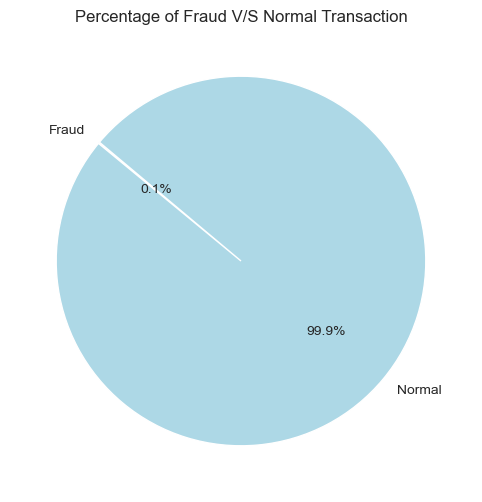

In [13]:
# percentage of fraud v/s Normal Transaction

Fraud_count=df[df['isFraud']==1]['isFraud'].count()
Normal_count=df[df['isFraud']==0]['isFraud'].count()

labels=['Fraud','Normal']
counts=[Fraud_count,Normal_count]
colors=['blue','lightblue']

plt.figure(figsize=(8,6))
plt.pie(counts,labels=labels,colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Percentage of Fraud V/S Normal Transaction")
plt.show()

+ the frauds in financila transacions are very small in size as compareto the whole dataset, with a percentage of as least as 0.1. but if we count the values of fraudent tranaction they are above 8000.
+ Fraud are rare bu tthe detectionof those must be efficient.

Text(0, 0.5, 'Count')

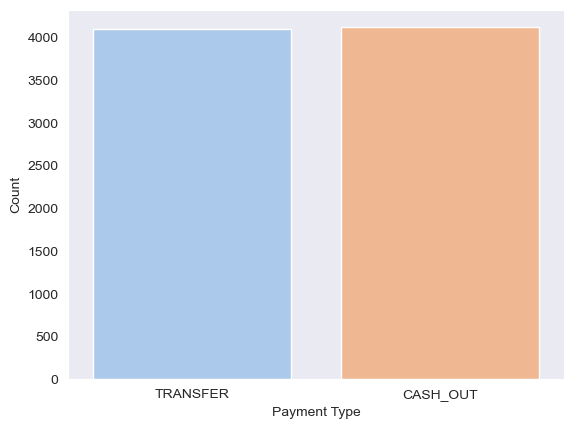

In [14]:
# type of payment involved in Fraud transaction

isfraud=df[df['isFraud']==1]
isfraud
count=df['type'].value_counts()
labels=df['type'].unique()
sns.countplot(data=isfraud,x='type')
plt.xlabel("Payment Type")
plt.ylabel("Count")

+ We discussed earlier that may be most fraud tranaction are carried out by "cash out" and " payment " transaction type, but it is reviled that fraud tranaction happens only in "cash out" and  "transfer".
+ As both cash out and transfer invloves money to flow from users account to others. 

<Axes: >

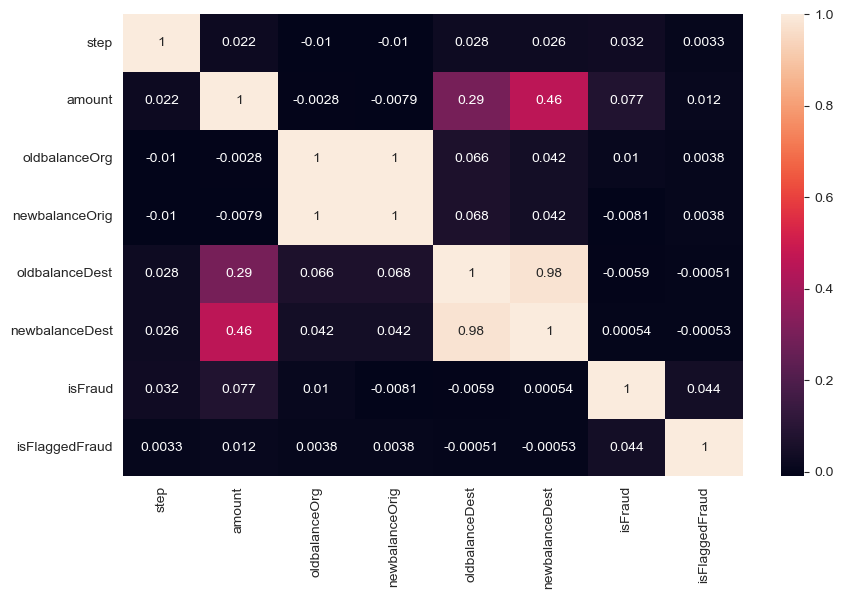

In [15]:
# Correlation between each features

corr=df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

## Machine Learning


### Feature selection

In [16]:
df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'], axis = 1, inplace = True)

In [17]:
# nameDest and nameOrig can also be removed
df.drop(['nameOrig', 'nameDest'], axis = 1, inplace = True)

In [18]:
# printing the data frame after removing the columns
df.head()

,step,type,amount,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,0,0
1,1,PAYMENT,1864.28,0,0
2,1,TRANSFER,181.00,1,0
3,1,CASH_OUT,181.00,1,0
4,1,PAYMENT,11668.14,0,0


### Encoding

In [19]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [20]:
# separating feature variables and class variables
X = df.drop('isFraud', axis = 1)
y = df['isFraud']

### Normalization

In [21]:
X = np.asarray(X)
y=np.asarray(y)

In [22]:
# standardizing the data
sc = StandardScaler()
X = sc.fit_transform(X)
X[0:5]

array([[-1.70304158e+00,  9.52399323e-01, -2.81559923e-01,
        -1.58577857e-03],
       [-1.70304158e+00,  9.52399323e-01, -2.94767262e-01,
        -1.58577857e-03],
       [-1.70304158e+00,  1.69307616e+00, -2.97554804e-01,
        -1.58577857e-03],
       [-1.70304158e+00, -5.28954357e-01, -2.97554804e-01,
        -1.58577857e-03],
       [-1.70304158e+00,  9.52399323e-01, -2.78531894e-01,
        -1.58577857e-03]])

### Splitting Data and PREDICTION

In [23]:
# splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 40)

### Logistic regression

In [24]:
# make an object of logistic regression
lr = LogisticRegression(C=0.01,solver='liblinear')

#fitting the trainig data into lr model
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [25]:
# testing the model on test data
LR_pred = lr.predict(X_test)

In [26]:
predict_proba = lr.predict_proba(X_test)
predict_proba[0:5]

array([[9.97661428e-01, 2.33857204e-03],
       [9.98478547e-01, 1.52145328e-03],
       [9.99813792e-01, 1.86207564e-04],
       [9.99410345e-01, 5.89654820e-04],
       [9.99274437e-01, 7.25562678e-04]])

#### Evaluation

In [27]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, lr.predict(X_train)))

LR_Accuracy_Score = metrics.accuracy_score(y_test,LR_pred)
print("Test Accuracy",LR_Accuracy_Score)
LR_JaccardIndex = jaccard_score(y_test,LR_pred,pos_label=0)
print("Jaccard Index",LR_JaccardIndex)
LR_F1_Score = f1_score(y_test,LR_pred)
print("F1 Score",LR_F1_Score)
LR_Log_Loss = log_loss(LR_pred,predict_proba)
print("Log Loss",LR_Log_Loss)


Train set Accuracy:  0.9987125698892235
Test Accuracy 0.9986420688332793
Jaccard Index 0.9986420631419684
F1 Score 0.006134969325153375
Log Loss 0.0014201581995385063


In [28]:
# code to plot confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, LR_pred, labels=[0,1]))

[[1906186      37]
 [   2555       8]]


Confusion matrix, without normalization
[[      8    2555]
 [     37 1906186]]


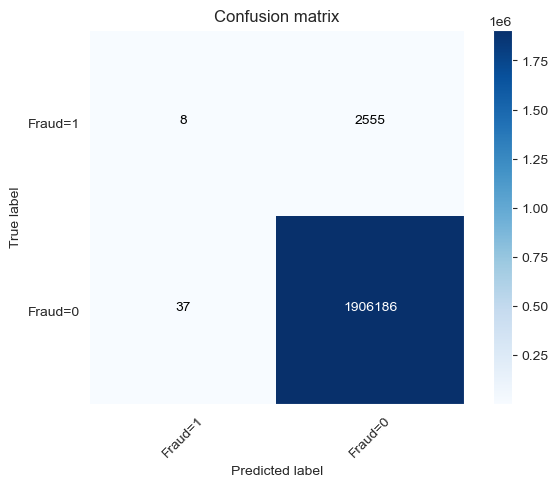

In [29]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, LR_pred, labels=[1,0])
np.set_printoptions(precision=2)


# # Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud=1','Fraud=0'],normalize= False,  title='Confusion matrix')

In [30]:
print (classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906223
           1       0.18      0.00      0.01      2563

    accuracy                           1.00   1908786
   macro avg       0.59      0.50      0.50   1908786
weighted avg       1.00      1.00      1.00   1908786



### Decision tree

In [31]:
DT= DecisionTreeClassifier(criterion="entropy",max_depth = 14)

#fitting the trainig data into lr model
DT.fit(X_train, y_train)

# testing the model on test data
DT_pred = DT.predict(X_test)

In [32]:
print (DT_pred [100:120])
print (y_test [100:120])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#### Evaluation

In [33]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, DT.predict(X_train)))

Tree_Accuracy_Score = metrics.accuracy_score(y_test,DT_pred)
print("Test accuracy",Tree_Accuracy_Score)
Tree_JaccardIndex = jaccard_score(y_test,DT_pred,pos_label=0)
print("Jaccard Index", Tree_JaccardIndex)
Tree_F1_Score = f1_score(y_test,DT_pred)
print("F1 Score",Tree_F1_Score)


Train set Accuracy:  0.9993217079936073
Test accuracy 0.9990276542262988
Jaccard Index 0.9990271787186958
F1 Score 0.5013433637829124


Confusion matrix, without normalization
[[    933    1630]
 [    226 1905997]]


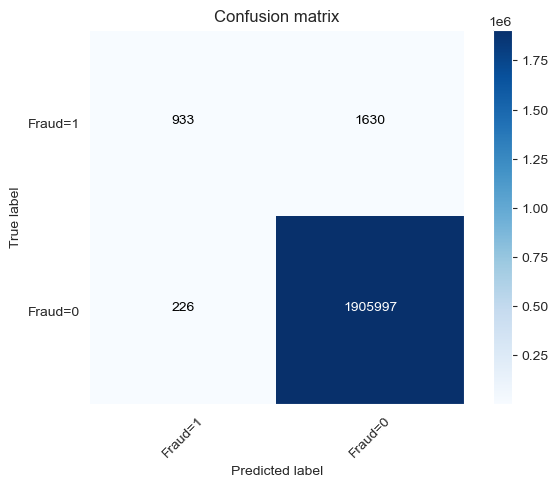

In [34]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, DT_pred, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud=1','Fraud=0'],normalize= False,  title='Confusion matrix')

In [35]:
print (classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906223
           1       0.81      0.36      0.50      2563

    accuracy                           1.00   1908786
   macro avg       0.90      0.68      0.75   1908786
weighted avg       1.00      1.00      1.00   1908786



### K Nearest Neighbor

In [36]:
X_train_norm = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))

k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [37]:
KNN_pred = neigh.predict(X_test)
KNN_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

#### Evaluation

In [38]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))

KNN_Accuracy_Score = metrics.accuracy_score(y_test,KNN_pred)
print("Test Accuracy",KNN_Accuracy_Score)
KNN_JaccardIndex = jaccard_score(y_test,KNN_pred,pos_label=0)
print("Jacard Index",KNN_JaccardIndex)
KNN_F1_Score = f1_score(y_test,KNN_pred)
print("F1 score",KNN_F1_Score)


Train set Accuracy:  0.9990805674391996
Test Accuracy 0.9989527374991225
Jacard Index 0.9989523922821865
F1 score 0.38624501074608536


Confusion matrix, without normalization
[[    629    1934]
 [     65 1906158]]


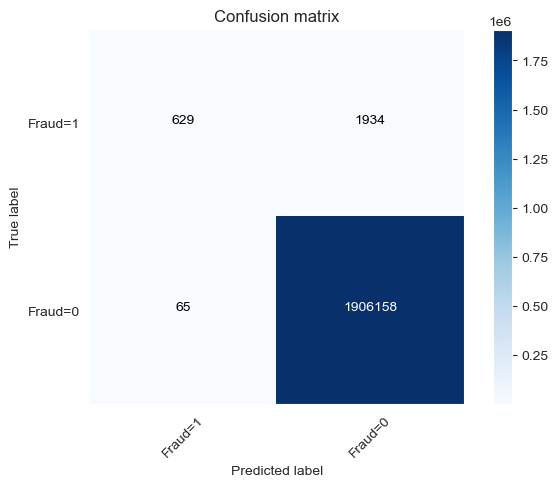

In [39]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, KNN_pred , labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud=1','Fraud=0'],normalize= False,  title='Confusion matrix')

In [43]:
print (classification_report(y_test, KNN_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906223
           1       0.91      0.25      0.39      2563

    accuracy                           1.00   1908786
   macro avg       0.95      0.62      0.69   1908786
weighted avg       1.00      1.00      1.00   1908786



In [44]:
Result=pd.DataFrame({'LR':{'Accuracy_Score':LR_Accuracy_Score,'JaccardIndex':LR_JaccardIndex,
                     'F1_Score':LR_F1_Score,'Log_Loss':LR_Log_Loss},
'KNN':{'Accuracy_Score':KNN_Accuracy_Score,'JaccardIndex':KNN_JaccardIndex,
                     'F1_Score':KNN_F1_Score,'Log_Loss':np.nan},
'Decision_Tree':{'Accuracy_Score':Tree_Accuracy_Score,'JaccardIndex':Tree_JaccardIndex,
                 'F1_Score':Tree_F1_Score,'Log_Loss':np.nan}})
Result

,LR,KNN,Decision_Tree
Accuracy_Score,0.998642,0.998953,0.999028
JaccardIndex,0.998642,0.998952,0.999027
F1_Score,0.006135,0.386245,0.501343
Log_Loss,0.001420,NaN,NaN


   Logistic  Decision Tree       KNN
1  0.998642       0.999028  0.998953
Higher prediction is from Decison Tree


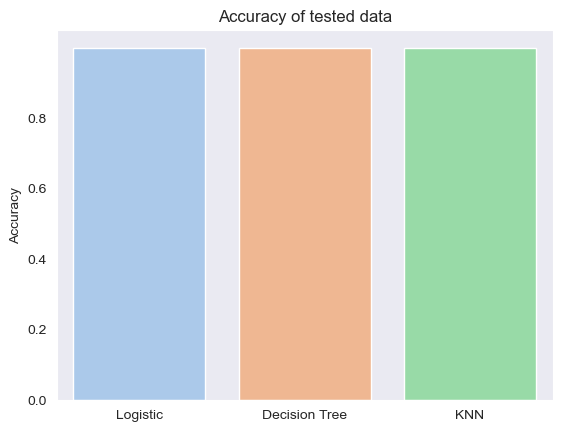

In [55]:
Accuracy=pd.DataFrame({'Logistic':LR_Accuracy_Score,'Decision Tree':Tree_Accuracy_Score,'KNN':KNN_Accuracy_Score},index=[1])
import seaborn as sns
sns.barplot(data=Accuracy)
plt.ylabel("Accuracy")
plt.title("Accuracy of tested data")

plt.yticks(np.arange(0.0, 1,0.2 ))
print(Accuracy)
print('Higher prediction is from Decison Tree')

